In [1]:
## Imports:

import glob

import numpy as np
import matplotlib
from matplotlib.colors import LogNorm
from matplotlib.ticker import AutoMinorLocator
import matplotlib.pyplot as plt
from matplotlib import gridspec            # to arrange the plots nicely
from matplotlib import transforms
from matplotlib.image import NonUniformImage
from matplotlib.patches import Rectangle
from matplotlib.colors import Normalize
%matplotlib inline

import uproot                              # uproot for easy import of ROOT tree contents
import collections                         # used for named tuples
import pandas as pd
import math
import ast
from scipy import optimize
from scipy.optimize import curve_fit
from scipy.optimize import minimize
from numpy import exp
from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show
import matplotlib.patches as patches
import matplotlib.cbook as cbook
from scipy.interpolate import spline
from scipy.interpolate import make_interp_spline, BSpline

In [2]:
## Function definitions:

def f_polar_R(cartesian_x, cartesian_y):
    return np.sqrt(cartesian_x * cartesian_x + cartesian_y * cartesian_y)

def f_polar_Phi(cartesian_x, cartesian_y):
    return np.arctan2(cartesian_y, cartesian_x)

def f_distance(x_a, y_a, x_b, y_b):
    return np.sqrt((x_b - x_a)**2 + (y_b - y_a)**2)


def flatten_tuples(tup):
    return np.array([element for tupl in tup for element in tupl])

def sum_tuple_subentries(tup):
    return [np.sum(tupl) for tupl in tup]

def nth_tuple_subentries(tup, n):
    return [tupl[n] for tupl in tup]


def from_np_array(array_string):
    array_string = ','.join(array_string.replace('[ ', '[').split())
    return np.array(ast.literal_eval(array_string))

from math import log10, floor
def round_to_1(x):
    return round(x, -int(floor(log10(abs(x)))))
def round_sig(x, sig=2):
    return round(x, sig-int(floor(log10(abs(x))))-1)

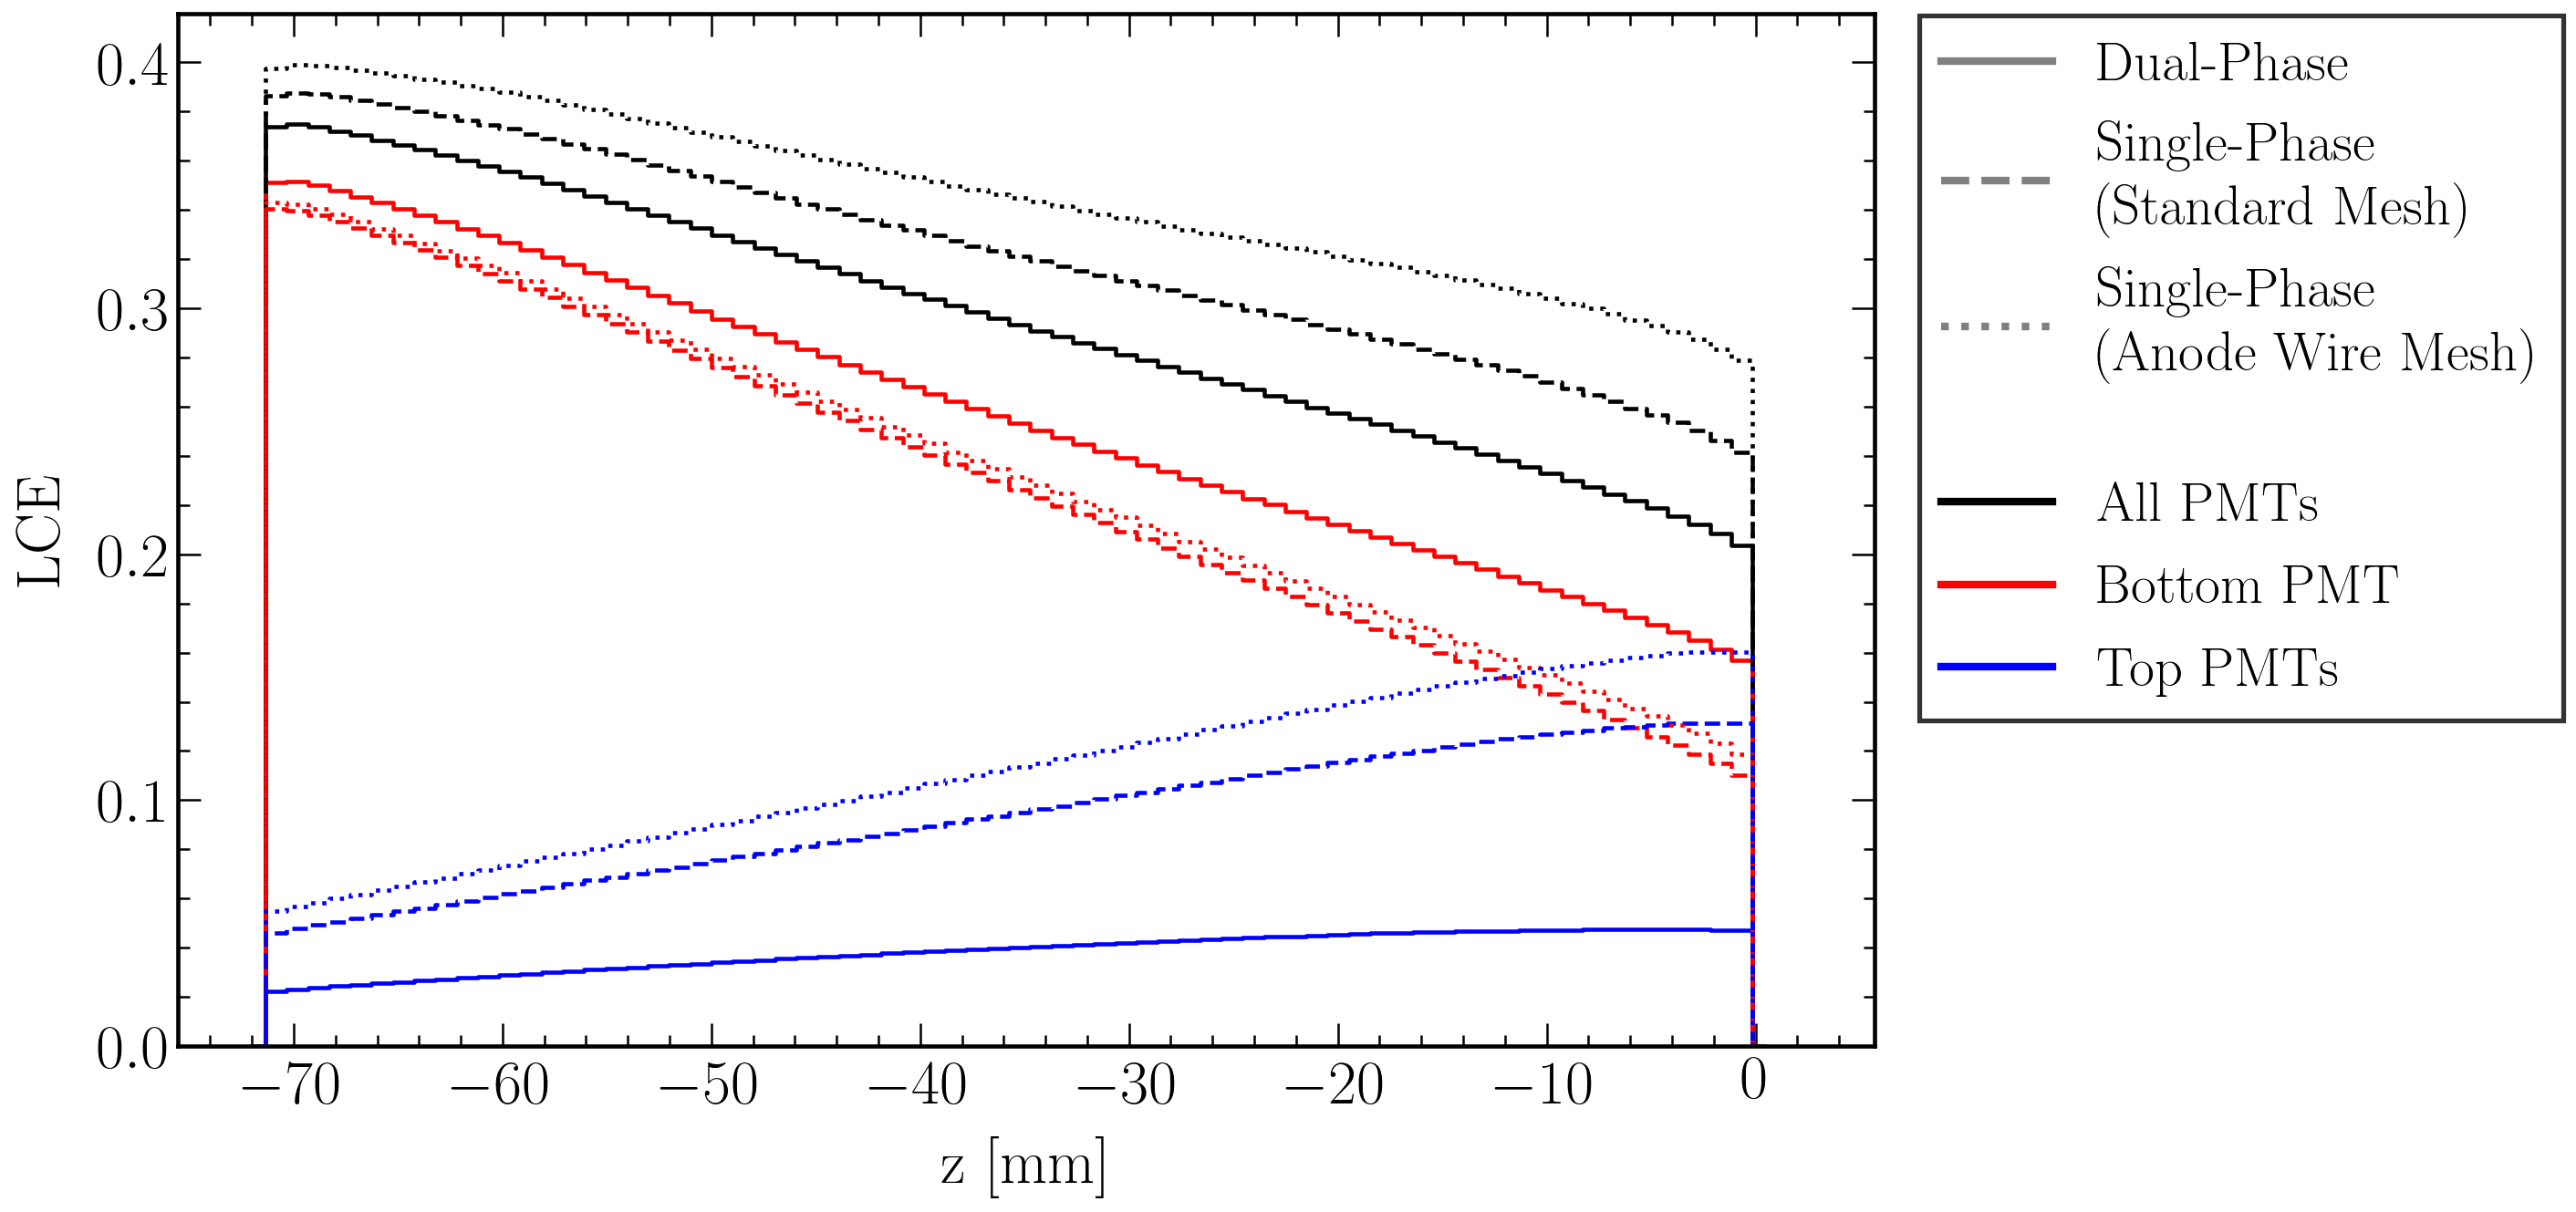

In [23]:
#############################################
## Set plot styles:
#############################################

fig=plt.figure(figsize=(16, 10), dpi=150)

# Text options
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Labels
label_size = 32.5 #25
label_pad = 13 #10
title_size = 39 #30
title_pad = 26 #20

# Axes Parameters
axes = plt.gca()
axes.tick_params(axis='both') 

# Axes ---> Linewidth
for axis in ['top','bottom','left','right']:
    axes.spines[axis].set_linewidth(2.2)
    
# Axes ---> Ticks
axes.xaxis.set_minor_locator(AutoMinorLocator(5)) 
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
axes.yaxis.set_minor_locator(AutoMinorLocator(5))
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
plt.tick_params(which='major', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=12)

# Grid
#plt.grid(True)
    
#############################################
## Plot specific settings and plot data
#############################################

# Data plot

plt.plot((1,2), (-1,-1), label = 'Dual-Phase', color = 'gray', linestyle = '-')
plt.plot((1,2), (-1,-1), label = 'Single-Phase\n(Standard Mesh)', color = 'gray', linestyle = '--')
plt.plot((1,2), (-1,-1), label = 'Single-Phase\n(Anode Wire Mesh)', color = 'gray', linestyle = ':')

plt.plot((1,2), (-1,-1), label = ' ', color = 'none', linestyle = 'none')

LCE_z_hist = pd.read_pickle('optPhot_S1_1.0e+06_pmtGap4.5_RPTFE0.95_LXeAbs100_Tmesh0.89770509_nop_1.0e+04_LCE_z_hist.pkl')
linestyle = '-'

bns = np.concatenate((np.array([2*LCE_z_hist['binscenter_z'].loc['all'][0]-LCE_z_hist['binscenter_z'].loc['all'][1]]), LCE_z_hist['binscenter_z'].loc['all'], np.array([2*LCE_z_hist['binscenter_z'].loc['all'][-1]-LCE_z_hist['binscenter_z'].loc['all'][-2]])))
ns = np.concatenate((np.array([0]), LCE_z_hist['LCE'].loc['all'], np.array([0])))
plt.step(bns, ns, where='mid', linewidth = 2.2, label = 'All PMTs', color = 'k', linestyle = linestyle)
ns = np.concatenate((np.array([0]), LCE_z_hist['LCE'].loc['bottom'], np.array([0])))
plt.step(bns, ns, where='mid', linewidth = 2.2, label = 'Bottom PMT', color = 'r', linestyle = linestyle)
ns = np.concatenate((np.array([0]), LCE_z_hist['LCE'].loc['top'], np.array([0])))
plt.step(bns, ns, where='mid', linewidth = 2.2, label = 'Top PMTs', color = 'b', linestyle = linestyle)


LCE_z_hist = pd.read_pickle('SP_optPhot_S1_1.0e+06_pmtGap4.5_RPTFE0.95_LXeAbs100_Tmesh0.89770509_nop_1.0e+04_LCE_z_hist.pkl')
linestyle = '--'

bns = np.concatenate((np.array([2*LCE_z_hist['binscenter_z'].loc['all'][0]-LCE_z_hist['binscenter_z'].loc['all'][1]]), LCE_z_hist['binscenter_z'].loc['all'], np.array([2*LCE_z_hist['binscenter_z'].loc['all'][-1]-LCE_z_hist['binscenter_z'].loc['all'][-2]])))
ns = np.concatenate((np.array([0]), LCE_z_hist['LCE'].loc['all'], np.array([0])))
plt.step(bns, ns, where='mid', linewidth = 2.2, color = 'k', linestyle = linestyle)
ns = np.concatenate((np.array([0]), LCE_z_hist['LCE'].loc['bottom'], np.array([0])))
plt.step(bns, ns, where='mid', linewidth = 2.2, color = 'r', linestyle = linestyle)
ns = np.concatenate((np.array([0]), LCE_z_hist['LCE'].loc['top'], np.array([0])))
plt.step(bns, ns, where='mid', linewidth = 2.2, color = 'b', linestyle = linestyle)


LCE_z_hist = pd.read_pickle('SP_thinWireMesh_optPhot_S1_1.0e+06_pmtGap4.5_RPTFE0.95_LXeAbs100_Tmesh0.89770509_nop_1.0e+04_LCE_z_hist.pkl')
linestyle = ':'

bns = np.concatenate((np.array([2*LCE_z_hist['binscenter_z'].loc['all'][0]-LCE_z_hist['binscenter_z'].loc['all'][1]]), LCE_z_hist['binscenter_z'].loc['all'], np.array([2*LCE_z_hist['binscenter_z'].loc['all'][-1]-LCE_z_hist['binscenter_z'].loc['all'][-2]])))
ns = np.concatenate((np.array([0]), LCE_z_hist['LCE'].loc['all'], np.array([0])))
plt.step(bns, ns, where='mid', linewidth = 2.2, color = 'k', linestyle = linestyle)
ns = np.concatenate((np.array([0]), LCE_z_hist['LCE'].loc['bottom'], np.array([0])))
plt.step(bns, ns, where='mid', linewidth = 2.2, color = 'r', linestyle = linestyle)
ns = np.concatenate((np.array([0]), LCE_z_hist['LCE'].loc['top'], np.array([0])))
plt.step(bns, ns, where='mid', linewidth = 2.2, color = 'b', linestyle = linestyle)


plt.ylim(0.,0.42)

plt.xlabel('z [mm]', fontsize = label_size, labelpad = label_pad)
plt.ylabel('LCE', fontsize = label_size, labelpad = label_pad)
#plt.title('1D Light Collection Efficiency', fontsize = title_size, pad = title_pad)

# Legend
leg = plt.legend(loc=2, bbox_to_anchor=(1.01,1.025), fontsize=0.9*label_size, frameon=True, shadow=False, edgecolor='black', fancybox=False)
#leg = plt.legend(loc=1, bbox_to_anchor=(0.99,0.99), fontsize=0.9*label_size, frameon=True, shadow=False, edgecolor='black', fancybox=False)
for line in leg.get_lines(): # enumerated
    line.set_linewidth(4)
leg.get_frame().set_linewidth(2.5)

fig.savefig("DP_SP_LCE_z_comparison.png", bbox_inches='tight')
plt.show()